In [ ]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [ ]:
df = pd.read_stata("Reguler_Non_Kap_Sudah_Bobot_Semua.dta")

In [ ]:
# ekstrak tahun dari tanggal kunjungan
df['Tahun'] = df['PNK03'].dt.strftime("%Y")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95617 entries, 0 to 95616
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PSTV01  95617 non-null  float64       
 1   PSTV02  95617 non-null  float64       
 2   PSTV15  95617 non-null  float64       
 3   PNK02   95617 non-null  object        
 4   PNK03   95617 non-null  datetime64[ns]
 5   PNK04   95617 non-null  datetime64[ns]
 6   PNK05   95617 non-null  datetime64[ns]
 7   PNK06   95617 non-null  category      
 8   PNK07   95617 non-null  category      
 9   PNK08   95617 non-null  category      
 10  PNK09   95617 non-null  category      
 11  PNK10   95617 non-null  category      
 12  PNK11   95617 non-null  category      
 13  PNK12   95617 non-null  category      
 14  PNK13   95617 non-null  category      
 15  PNK13A  95617 non-null  object        
 16  PNK14   95617 non-null  object        
 17  PNK15   95617 non-null  object        
 18  PNK16 

# 1. Top 10 Pelayanan FKTP Reguler Non Kapitasi Terbanyak dan Rata-Rata Biayanya

In [ ]:
df_biaya = df.groupby(['PNK16','PNK17']).size().reset_index(name = 'count')
df_biaya = df_biaya.sort_values('count', ascending = False)
df_biaya.head(10)

,PNK16,PNK17,count
12767,Paket Persalinan per Vaginam normal (oleh Bidan),700000.0,8907
15166,Gula Darah Puasa (GDP) - PRB/Prolanis,20000.0,8263
16793,Microalbuminaria,120000.0,7464
14414,Kreatinin,30000.0,7304
13656,Ureum,30000.0,7302
18971,Kolesterol HDL,45000.0,7298
18226,Kolesterol LDL,60000.0,7277
17455,Kolesterol Total,45000.0,7131
19733,Kolesterol Trigliserida,50000.0,7025
760,Pelayanan KB : Suntik,15000.0,5754


In [ ]:
df_jumlah_biaya = df_biaya.groupby(['PNK16']).agg({'PNK17' : 'sum', 'count' : 'sum'}).reset_index()
df_jumlah_biaya = df_jumlah_biaya.sort_values('count', ascending = False)
df_jumlah_biaya['mean'] = df_jumlah_biaya['PNK17'] / df_jumlah_biaya['count']
top_10_biaya_layanan = df_jumlah_biaya.head(10)
top_10_biaya_layanan = top_10_biaya_layanan.sort_values('mean', ascending = False)
top_10_biaya_layanan

,PNK16,PNK17,count,mean
1,Pelayanan KB : Suntik,326472038.0,5754,56738.275634
22,Microalbuminaria,326472038.0,7722,42278.171199
18,Ureum,326472038.0,7833,41679.055024
19,Kreatinin,326472038.0,7835,41668.415826
26,Kolesterol Trigliserida,326472038.0,7843,41625.913298
23,Kolesterol Total,326472038.0,7847,41604.694533
25,Kolesterol HDL,326472038.0,7858,41546.454314
24,Kolesterol LDL,326472038.0,7858,41546.454314
16,Paket Persalinan per Vaginam normal (oleh Bidan),326472038.0,8908,36649.308262
20,Gula Darah Puasa (GDP) - PRB/Prolanis,326472038.0,11586,28178.149318


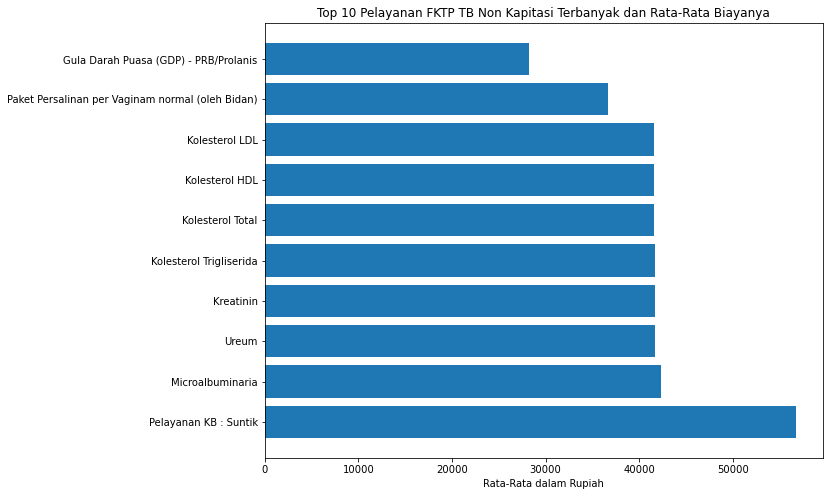

In [ ]:
# Plotting
plt.figure(figsize=(10,8))

x = top_10_biaya_layanan['PNK16']
y = top_10_biaya_layanan['mean']

plt.barh(x,y)
plt.title('Top 10 Pelayanan FKTP Reguler Non Kapitasi Terbanyak dan Rata-Rata Biayanya')
plt.xlabel('Rata-Rata dalam Rupiah')
plt.show()

# 2. Sepuluh Diagnosis Terbanyak pada Reguler Non Kapitasi

In [ ]:
df_diagnosis_masuk = df.groupby(['PNK13','PNK13A']).size().reset_index(name = 'count')
df_diagnosis_masuk = df_diagnosis_masuk.sort_values('count', ascending = False)
top_diagnosis = df_diagnosis_masuk.head(10)
top_diagnosis

,PNK13,PNK13A,count
24790,E11 Type 2 diabetes mellitus,E11,34955
37187,I10 Essential (primary) hypertension,I10,24059
102860,O80 Single spontaneous delivery,O80,8340
142526,Z30 Contraceptive management,Z30,7304
26029,E14 Unspecified diabetes mellitus,E14,5507
24377,E10 Type 1 diabetes mellitus,E10,3558
38426,I15 Secondary hypertension,I15,1966
144178,Z34 Supervision of normal pregnancy,Z34,1496
146243,Z39 Postpartum care and examination,Z39,1207
145004,Z36 Antenatal screening,Z36,712


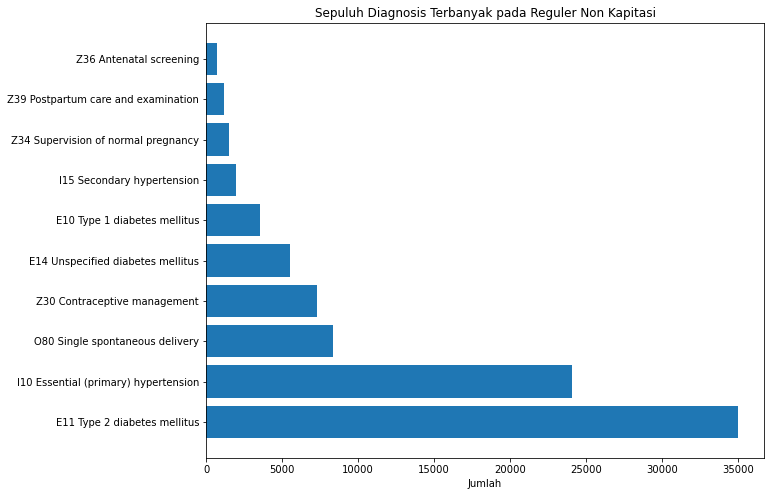

In [ ]:
# plotting bar
plt.figure(figsize=(10,8))

x = top_diagnosis['PNK13']
y = top_diagnosis['count']

plt.barh(x,y)
plt.title('Sepuluh Diagnosis Terbanyak pada Reguler Non Kapitasi')
plt.xlabel('Jumlah')
plt.show()

# 3. Distribusi Segmen Peserta

In [ ]:
df_segmen = df.groupby(['PNK12']).size().reset_index(name = 'count')
df_segmen = df_segmen.sort_values('count', ascending = False)
df_segmen

,PNK12,count
4,PPU,27509
3,PBPU,24993
1,PBI APBN,21327
0,BUKAN PEKERJA,16253
2,PBI APBD,5535


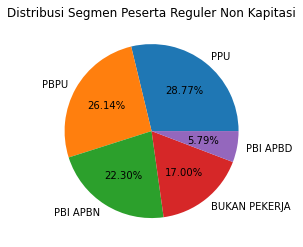

In [ ]:
y = df_segmen['count']
x = df_segmen['PNK12']

plt.pie(y, labels = x, autopct = '%.2f%%')
plt.title('Distribusi Segmen Peserta Reguler Non Kapitasi')
plt.show()

# 4. Distribusi Jenis Faskes dan Segmen Peserta yang mengaksesnya

In [ ]:
df_faskes = df.groupby(['PNK09','PNK12']).size().reset_index(name = 'count')
df_faskes = df_faskes.drop(df_faskes.index[25:])
df_faskes

,PNK09,PNK12,count
0,PUSKESMAS,BUKAN PEKERJA,474
1,PUSKESMAS,PBI APBN,7911
2,PUSKESMAS,PBI APBD,2257
3,PUSKESMAS,PBPU,2798
4,PUSKESMAS,PPU,3466
5,KLINIK PRATAMA,BUKAN PEKERJA,631
6,KLINIK PRATAMA,PBI APBN,1237
7,KLINIK PRATAMA,PBI APBD,272
8,KLINIK PRATAMA,PBPU,2285
9,KLINIK PRATAMA,PPU,3549


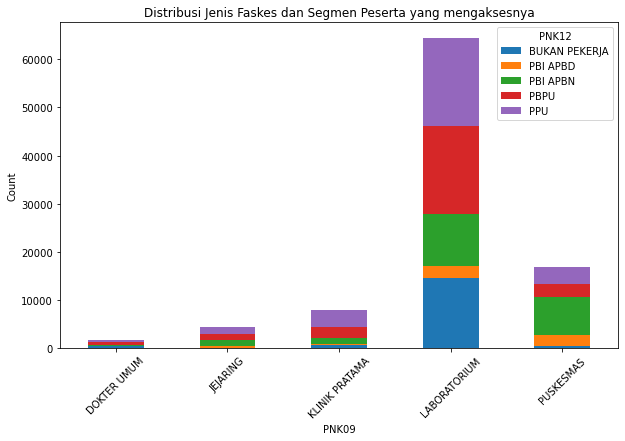

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data as a DataFrame
data = {
    'PNK09': ['PUSKESMAS', 'PUSKESMAS', 'PUSKESMAS', 'PUSKESMAS', 'PUSKESMAS',
              'KLINIK PRATAMA', 'KLINIK PRATAMA', 'KLINIK PRATAMA', 'KLINIK PRATAMA', 'KLINIK PRATAMA',
              'DOKTER UMUM', 'DOKTER UMUM', 'DOKTER UMUM', 'DOKTER UMUM', 'DOKTER UMUM',
              'LABORATORIUM', 'LABORATORIUM', 'LABORATORIUM', 'LABORATORIUM', 'LABORATORIUM',
              'JEJARING', 'JEJARING', 'JEJARING', 'JEJARING', 'JEJARING'
             ],
    'PNK12': ['BUKAN PEKERJA', 'PBI APBN', 'PBI APBD', 'PBPU', 'PPU',
              'BUKAN PEKERJA', 'PBI APBN', 'PBI APBD', 'PBPU', 'PPU',
              'BUKAN PEKERJA', 'PBI APBN', 'PBI APBD', 'PBPU', 'PPU',
              'BUKAN PEKERJA', 'PBI APBN', 'PBI APBD', 'PBPU', 'PPU',
              'BUKAN PEKERJA', 'PBI APBN', 'PBI APBD', 'PBPU', 'PPU'
              ],
    'count': [474, 7911, 2257, 2798, 3466,
              631, 1237, 272, 2285, 3549,
              475, 182, 51, 535, 575,
              14664, 10759, 2462, 18214, 18354,
              9, 1238, 493, 1161, 1560
              ]
}

df_coba = pd.DataFrame(data)

# Pivot the DataFrame to reshape the data for plotting
pivot_df = df_coba.pivot(index='PNK09', columns='PNK12', values='count').fillna(0)

# Create the stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot properties (labels, title, etc.)
ax.set_xlabel('PNK09')
ax.set_ylabel('Count')
ax.set_title('Distribusi Jenis Faskes dan Segmen Peserta yang mengaksesnya')
plt.xticks(rotation=45)

# Show the plot
plt.show()


# 5. Jenis Faskes dan Distribusinya

In [ ]:
df_kunjungan_faskes = df.groupby(['PNK09','Tahun']).size().reset_index(name = 'count')
df_kunjungan_faskes = df_kunjungan_faskes[df_kunjungan_faskes['Tahun'] > '2014']
df_kunjungan_faskes = df_kunjungan_faskes.sort_values('count', ascending = False)
df_kunjungan_faskes

,PNK09,Tahun,count
7,LABORATORIUM,2021,64453
1,PUSKESMAS,2021,16894
3,KLINIK PRATAMA,2021,7971
9,JEJARING,2021,4460
5,DOKTER UMUM,2021,1818
0,PUSKESMAS,2020,12
11,99.0,2021,5
2,KLINIK PRATAMA,2020,3
8,JEJARING,2020,1
4,DOKTER UMUM,2020,0


In [ ]:
faskes_2020 = df_kunjungan_faskes[df_kunjungan_faskes['Tahun'] == '2020']
faskes_2020

,PNK09,Tahun,count
0,PUSKESMAS,2020,12
2,KLINIK PRATAMA,2020,3
8,JEJARING,2020,1
4,DOKTER UMUM,2020,0
6,LABORATORIUM,2020,0
10,99.0,2020,0


In [ ]:
faskes_2020 = faskes_2020.drop(labels = [10])

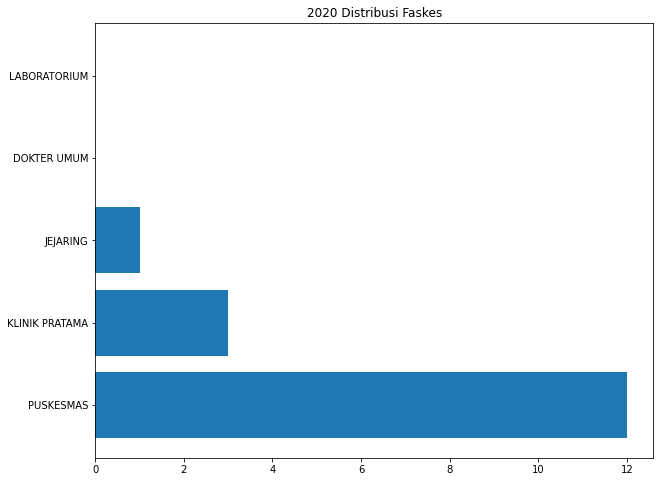

In [ ]:
plt.figure(figsize = (10,8))

x = faskes_2020['PNK09']
y = faskes_2020['count']

plt.barh(x,y)
plt.title('2020 Distribusi Faskes')
plt.show()

In [ ]:
faskes_2021 = df_kunjungan_faskes[df_kunjungan_faskes['Tahun'] == '2021']
faskes_2021

,PNK09,Tahun,count
7,LABORATORIUM,2021,64453
1,PUSKESMAS,2021,16894
3,KLINIK PRATAMA,2021,7971
9,JEJARING,2021,4460
5,DOKTER UMUM,2021,1818
11,99.0,2021,5


In [ ]:
faskes_2021 = faskes_2021.drop(labels = [11])

Text(0.5, 1.0, '2021 Distribusi Faskes')

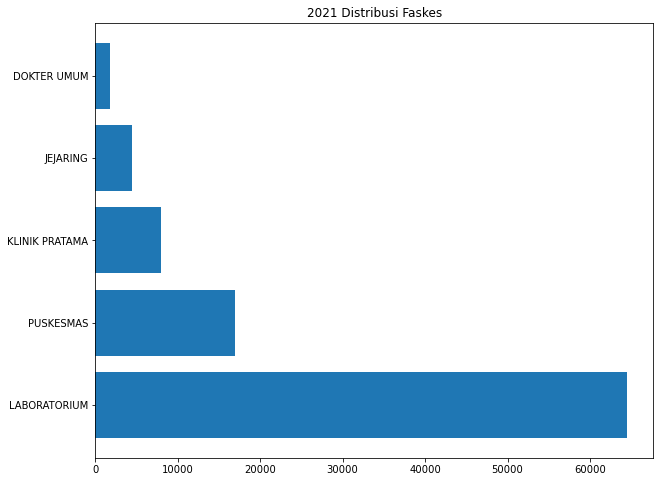

In [ ]:
plt.figure(figsize = (10,8))

x = faskes_2021['PNK09']
y = faskes_2021['count']

plt.barh(x,y)
plt.title('2021 Distribusi Faskes')

# 6. Distribusi Tingkat Layanan yang Diterima Pasien

In [ ]:
df_tingkat_layanan = df.groupby(['PNK11','Tahun']).size().reset_index(name = 'count')
df_tingkat_layanan

,PNK11,Tahun,count
0,RJTP,2020,0
1,RJTP,2021,13912
2,RITP,2020,16
3,RITP,2021,11323
4,PROMOTIF,2020,0
5,PROMOTIF,2021,70366


In [ ]:
layanan_2020 = df_tingkat_layanan[df_tingkat_layanan['Tahun'] == '2020']
layanan_2020

,PNK11,Tahun,count
0,RJTP,2020,0
2,RITP,2020,16
4,PROMOTIF,2020,0


Text(0.5, 1.0, '2020 Distribusi Tingkat Layanan')

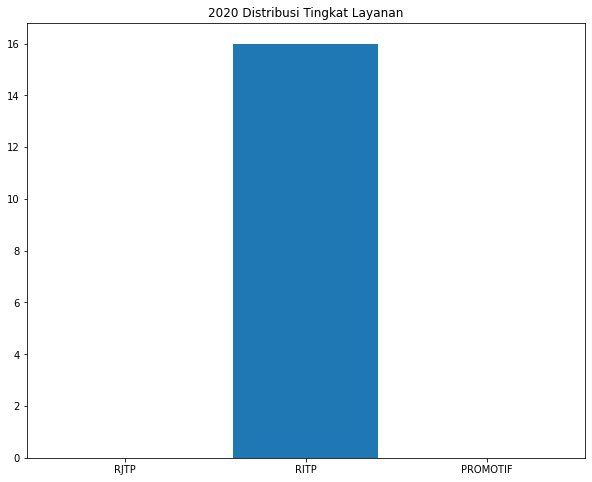

In [ ]:
plt.figure(figsize = (10,8))

x = layanan_2020['PNK11']
y = layanan_2020['count']

plt.bar(x,y)
plt.title('2020 Distribusi Tingkat Layanan')

In [ ]:
layanan_2021 = df_tingkat_layanan[df_tingkat_layanan['Tahun'] == '2021']
layanan_2021

,PNK11,Tahun,count
1,RJTP,2021,13912
3,RITP,2021,11323
5,PROMOTIF,2021,70366


Text(0.5, 1.0, '2021 Distribusi Tingkat Layanan')

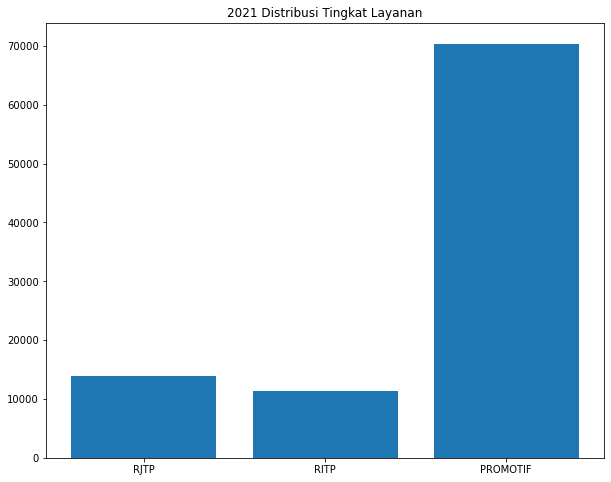

In [ ]:
plt.figure(figsize = (10,8))

x = layanan_2021['PNK11']
y = layanan_2021['count']

plt.bar(x,y)
plt.title('2021 Distribusi Tingkat Layanan')

# 7.Rata-Rata Waktu Tunggu Layanan Per Provinsi

In [ ]:
df['waktu_tunggu'] = df['PNK04'] - df['PNK03']

In [ ]:
df_waktu_tunggu = df.groupby(['PNK06']).agg({'waktu_tunggu' : 'mean'}).reset_index()
df_waktu_tunggu

,PNK06,waktu_tunggu
0,ACEH,0 days 02:14:22.727774710
1,SUMATERA UTARA,0 days 03:19:15.630252100
2,SUMATERA BARAT,0 days 01:08:48.531855955
3,RIAU,0 days 00:57:10.516165626
4,JAMBI,0 days 00:53:37.524644030
5,SUMATERA SELATAN,0 days 00:20:38.709677419
6,BENGKULU,0 days 01:16:16.664280601
7,LAMPUNG,0 days 04:21:28.812392426
8,KEPULAUAN BANGKA BELITUNG,0 days 01:40:00
9,DKI JAKARTA,0 days 00:00:00


In [ ]:
df_waktu_tunggu['waktu_tunggu'] = df_waktu_tunggu['waktu_tunggu'].astype(str)

In [ ]:
df_waktu_tunggu['waktu_tunggu'] = df_waktu_tunggu['waktu_tunggu'].str.split(' ', 1).str[1]
df_waktu_tunggu['waktu_tunggu'] = df_waktu_tunggu['waktu_tunggu'].str.split(':', 2).str[0:2]

In [ ]:
df_waktu_tunggu['waktu_tunggu'] = df_waktu_tunggu['waktu_tunggu'].apply(lambda x: str(x).replace('days', '').replace(', ', ':' ).replace('[', '').replace(']', ''))

In [ ]:
df_waktu_tunggu['waktu_tunggu'] = df_waktu_tunggu['waktu_tunggu'].str.replace("'", "")
df_waktu_tunggu = df_waktu_tunggu.sort_values('waktu_tunggu', ascending = False)
df_waktu_tunggu

,PNK06,waktu_tunggu
16,NUSA TENGGARA BARAT,04:28
7,LAMPUNG,04:21
1,SUMATERA UTARA,03:19
29,PAPUA,02:56
0,ACEH,02:14
33,KALIMANTAN UTARA,02:08
26,GORONTALO,02:06
13,JAWA TIMUR,02:02
10,JAWA BARAT,01:42
8,KEPULAUAN BANGKA BELITUNG,01:40


# 8. Rata-Rata Waktu Pelayanan Per Provinsi

In [ ]:
df['waktu_pelayanan'] = df['PNK05'] - df['PNK04']

In [ ]:
df_waktu_pelayanan = df.groupby(['PNK06']).agg({'waktu_pelayanan' : 'mean'}).reset_index()
df_waktu_pelayanan

,PNK06,waktu_pelayanan
0,ACEH,0 days 02:39:01.689674213
1,SUMATERA UTARA,0 days 02:51:25.714285714
2,SUMATERA BARAT,0 days 05:11:08.144044321
3,RIAU,0 days 02:20:29.268292682
4,JAMBI,0 days 03:25:02.300109529
5,SUMATERA SELATAN,0 days 02:44:30.967741935
6,BENGKULU,0 days 01:22:27.745168217
7,LAMPUNG,0 days 04:38:12.598967297
8,KEPULAUAN BANGKA BELITUNG,0 days 03:30:00
9,DKI JAKARTA,0 days 02:21:36.114195083


In [ ]:
df_waktu_pelayanan['waktu_pelayanan'] = df_waktu_pelayanan['waktu_pelayanan'].astype(str)

In [ ]:
df_waktu_pelayanan['waktu_pelayanan'] = df_waktu_pelayanan['waktu_pelayanan'].str.split(' ', 1).str[1]
df_waktu_pelayanan['waktu_pelayanan'] = df_waktu_pelayanan['waktu_pelayanan'].str.split(':', 2).str[0:2]

In [ ]:
df_waktu_pelayanan['waktu_pelayanan'] = df_waktu_pelayanan['waktu_pelayanan'].apply(lambda x: str(x).replace('days', '').replace(', ', ':' ).replace('[', '').replace(']', ''))

In [ ]:
df_waktu_pelayanan['waktu_pelayanan'] = df_waktu_pelayanan['waktu_pelayanan'].str.replace("'", "")
df_waktu_pelayanan = df_waktu_pelayanan.sort_values('waktu_pelayanan', ascending = False)
df_waktu_pelayanan

,PNK06,waktu_pelayanan
29,PAPUA,08:25
17,NUSA TENGGARA TIMUR,07:55
16,NUSA TENGGARA BARAT,06:37
2,SUMATERA BARAT,05:11
31,SULAWESI BARAT,04:48
7,LAMPUNG,04:38
24,SULAWESI SELATAN,04:31
18,KALIMANTAN BARAT,04:25
25,SULAWESI TENGGARA,04:24
20,KALIMANTAN SELATAN,04:23


# 9. Jumlah Kepemilikan Faskes FKTP Per-Provinsi

In [ ]:
df_kepemilikan = df.groupby(['PNK06','PNK08']).size().reset_index(name = 'count')
df_kepemilikan.sort_values('count', ascending = False)

# stacked bar chart
df_jateng = df_kepemilikan[df_kepemilikan['PNK06'] == 'DKI JAKARTA']
df_jateng

,PNK06,PNK08,count
72,DKI JAKARTA,PEMERINTAH PROVINSI,70
73,DKI JAKARTA,PEMERINTAH KABUPATEN/KOTA,339
74,DKI JAKARTA,POLRI,0
75,DKI JAKARTA,TNI AD,0
76,DKI JAKARTA,TNI AL,0
77,DKI JAKARTA,TNI AU,0
78,DKI JAKARTA,BUMN,67
79,DKI JAKARTA,SWASTA,785


In [ ]:
df['Tahun'].unique()

array(['2021', '2020'], dtype=object)

# 10. Top 10 Tindakan di FKTP Non Kapitasi Reguler

In [ ]:
df_tindakan = df.groupby(['PNK16','Tahun']).size().reset_index(name='count')
df_tindakan = df_tindakan.sort_values('count', ascending = False).head(10)
df_tindakan

,PNK16,Tahun,count
41,Gula Darah Puasa (GDP) - PRB/Prolanis,2021,11586
33,Paket Persalinan per Vaginam normal (oleh Bidan),2021,8903
51,Kolesterol HDL,2021,7858
49,Kolesterol LDL,2021,7858
47,Kolesterol Total,2021,7847
53,Kolesterol Trigliserida,2021,7843
39,Kreatinin,2021,7835
37,Ureum,2021,7833
45,Microalbuminaria,2021,7722
3,Pelayanan KB : Suntik,2021,5754


In [ ]:
tindakan_2021 = df_tindakan[df_tindakan['Tahun'] == '2021']

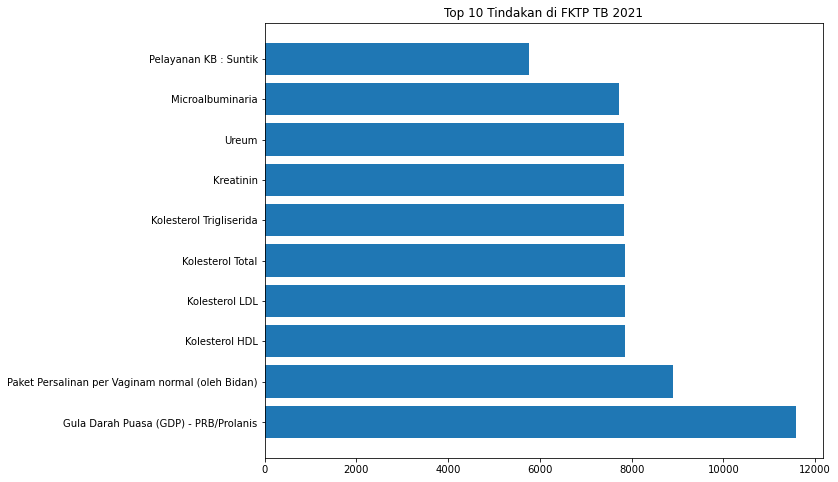

In [ ]:
# plotting
plt.figure(figsize=(10,8))
x = tindakan_2021['PNK16']
y = tindakan_2021['count']

plt.barh(x,y)
plt.title('Top 10 Tindakan di FKTP TB 2021')
plt.show()